# Flight_Price_Prediction

Problem Statement:
    
Flight ticket prices can be something hard to guess, today we might see a price, check out the price of the same flight tomorrow, it will be a different story. We might have often heard travellers saying that flight ticket prices are so unpredictable. Here you will be provided with prices of flight tickets for various airlines between the months of March and June of 2019 and between various cities.

FEATURES:
    
Airline: The name of the airline.

Date_of_Journey: The date of the journey

Source: The source from which the service begins.

Destination: The destination where the service ends.

Route: The route taken by the flight to reach the destination.

Dep_Time: The time when the journey starts from the source.

Arrival_Time: Time of arrival at the destination.

Duration: Total duration of the flight.

Total_Stops: Total stops between the source and destination.

Additional_Info: Additional information about the flight

Price: The price of the ticket

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel(r"C:\Users\poovi\Downloads\Flight_Ticket_Participant_Datasets-20190305T100527Z-001\Flight_Ticket_Participant_Datasets\Data_Train.xlsx")
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


# EDA:

In [3]:
df.shape

(10683, 11)

In [4]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

Columns:
    
    1. Airlines
    2. Date_of_Journey
    3. Source
    4. Destination
    5. Route
    6. Dep_Time
    7. Arrival_Time
    8. Duration
    9. Total_Stops
    10. Additional_Info

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [6]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [7]:
collist = df.columns.values

for i in collist:
    print(f"Unique of {i} is {df[i].unique()}\n")

Unique of Airline is ['IndiGo' 'Air India' 'Jet Airways' 'SpiceJet' 'Multiple carriers' 'GoAir'
 'Vistara' 'Air Asia' 'Vistara Premium economy' 'Jet Airways Business'
 'Multiple carriers Premium economy' 'Trujet']

Unique of Date_of_Journey is ['24/03/2019' '1/05/2019' '9/06/2019' '12/05/2019' '01/03/2019'
 '24/06/2019' '12/03/2019' '27/05/2019' '1/06/2019' '18/04/2019'
 '9/05/2019' '24/04/2019' '3/03/2019' '15/04/2019' '12/06/2019'
 '6/03/2019' '21/03/2019' '3/04/2019' '6/05/2019' '15/05/2019'
 '18/06/2019' '15/06/2019' '6/04/2019' '18/05/2019' '27/06/2019'
 '21/05/2019' '06/03/2019' '3/06/2019' '15/03/2019' '3/05/2019'
 '9/03/2019' '6/06/2019' '24/05/2019' '09/03/2019' '1/04/2019'
 '21/04/2019' '21/06/2019' '27/03/2019' '18/03/2019' '12/04/2019'
 '9/04/2019' '1/03/2019' '03/03/2019' '27/04/2019']

Unique of Source is ['Banglore' 'Kolkata' 'Delhi' 'Chennai' 'Mumbai']

Unique of Destination is ['New Delhi' 'Banglore' 'Cochin' 'Kolkata' 'Delhi' 'Hyderabad']

Unique of Route is ['BLR → D

In [8]:
df['Route']=df['Route'].fillna(df['Route'].mode()[0])

In [9]:
df['Total_Stops'] = df['Total_Stops'].fillna(df['Total_Stops'].mode()[0])

In [10]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

Now all null values are removed we can proceed with further analysis

In [11]:
df.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

# Feature Extraction

Here 'Date_of_Journey', 'Dep_Time' , 'Arrival_Time' is in object which can be converted to datetime format

In [12]:
df['Date_of_Journey'] = pd.to_datetime(df['Date_of_Journey'])
df['Dep_Time'] = pd.to_datetime(df['Dep_Time'])
df['Arrival_Time'] = pd.to_datetime(df['Arrival_Time'])

In [13]:
#checking data type after converting

df.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

In [14]:
#extract year, moth and day from Date_of_Journey

#year
df['Year_of_Journey'] = pd.to_datetime(df.Date_of_Journey,format="%d%m%Y").dt.year

#month
df['Month_of_Journey'] = pd.to_datetime(df.Date_of_Journey,format="%d%m%Y").dt.month

#day
df['Day_of_Journey'] = pd.to_datetime(df.Date_of_Journey,format="%d%m%Y").dt.day


In [15]:
#dropping Date_of_Journey

df = df.drop(['Date_of_Journey'],axis=1)

In [16]:
df

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Year_of_Journey,Month_of_Journey,Day_of_Journey
0,IndiGo,Banglore,New Delhi,BLR → DEL,2022-06-28 22:20:00,2022-03-22 01:10:00,2h 50m,non-stop,No info,3897,2019,3,24
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2022-06-28 05:50:00,2022-06-28 13:15:00,7h 25m,2 stops,No info,7662,2019,1,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2022-06-28 09:25:00,2022-06-10 04:25:00,19h,2 stops,No info,13882,2019,9,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,2022-06-28 18:05:00,2022-06-28 23:30:00,5h 25m,1 stop,No info,6218,2019,12,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,2022-06-28 16:50:00,2022-06-28 21:35:00,4h 45m,1 stop,No info,13302,2019,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,2022-06-28 19:55:00,2022-06-28 22:25:00,2h 30m,non-stop,No info,4107,2019,9,4
10679,Air India,Kolkata,Banglore,CCU → BLR,2022-06-28 20:45:00,2022-06-28 23:20:00,2h 35m,non-stop,No info,4145,2019,4,27
10680,Jet Airways,Banglore,Delhi,BLR → DEL,2022-06-28 08:20:00,2022-06-28 11:20:00,3h,non-stop,No info,7229,2019,4,27
10681,Vistara,Banglore,New Delhi,BLR → DEL,2022-06-28 11:30:00,2022-06-28 14:10:00,2h 40m,non-stop,No info,12648,2019,1,3


Duration column is the difference between Arrival_Time and Dep_Time.

In [17]:
Difference = (df['Arrival_Time'] - df['Dep_Time'])
Difference_list = list()
for i in range(len(Difference)):
    duration = Difference.iloc[i].seconds/3600
    Difference_list.append(duration)
df['Duration'] = Difference_list

In [18]:
#extract hours and minutes from Dep_time

#hours
df['Dep_Hour'] = pd.to_datetime(df['Dep_Time']).dt.hour

#minutes
df['Dep_Min'] = pd.to_datetime(df['Dep_Time']).dt.minute

In [19]:
#dropping Dep_Time

df = df.drop(['Dep_Time'],axis=1)

In [20]:
#extract hours and minutes from Arrival_Time

#hours
df['Arrival_Hour'] = pd.to_datetime(df['Arrival_Time']).dt.hour

#minutes
df['Arrival_Min'] = pd.to_datetime(df['Arrival_Time']).dt.minute

In [21]:
#dropping Arrival_Time

df = df.drop(['Arrival_Time'],axis=1)

In [22]:
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Year_of_Journey,Month_of_Journey,Day_of_Journey,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2.833333,non-stop,No info,3897,2019,3,24,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7.416667,2 stops,No info,7662,2019,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19.000000,2 stops,No info,13882,2019,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5.416667,1 stop,No info,6218,2019,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4.750000,1 stop,No info,13302,2019,1,3,16,50,21,35


In [23]:
collist = df.columns.values

for i in collist:
    print(f"Value counts of {i} is {df[i].value_counts()}\n")

Value counts of Airline is Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

Value counts of Source is Delhi       4537
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

Value counts of Destination is Cochin       4537
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

Value counts of Route is DEL → BOM → COK          2377
BLR → DEL                1552
CCU → BOM → BLR           979
CCU → BLR     

Year_of_Journey has all values as 2019 so we can drop it

In [24]:
df = df.drop(['Year_of_Journey'],axis=1)

We can see that some airlines names are repeated in other way so it is better to group them for better analysis

In [25]:
df['Airline'].replace("Jet Airways Business","Jet Airways",inplace=True)

In [26]:
df['Airline'].replace("Multiple carriers Premium economy","Multiple carriers",inplace=True)
df['Airline'].replace("Vistara Premium economy","Vistara",inplace=True)
#grouping destination
df['Destination'].replace("New Delhi","Delhi",inplace=True)


In [27]:
#grouping additional_info

df['Additional_Info'].replace("1 Long layover","Long layover",inplace=True)
df['Additional_Info'].replace("2 Long layover","Long layover",inplace=True)
df['Additional_Info'].replace("No Info","No Info",inplace=True)

finding categorical columns



In [28]:
col = df.columns
num_col = df._get_numeric_data().columns
cat_col = list(set(col)-set(num_col))
cat_col

['Additional_Info', 'Airline', 'Source', 'Route', 'Destination', 'Total_Stops']

# plotting categorical column

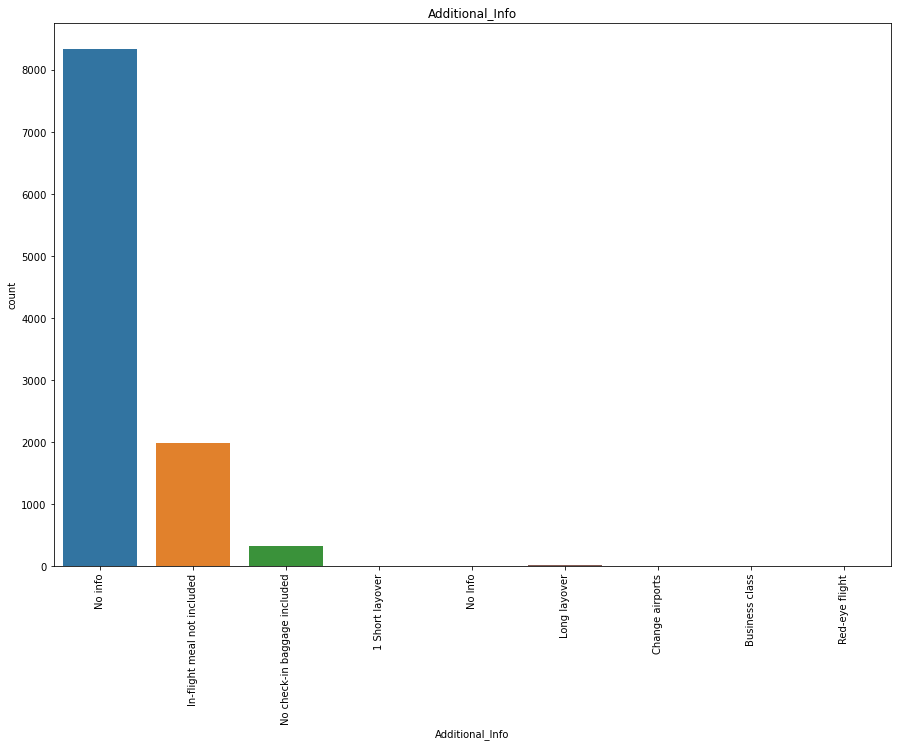

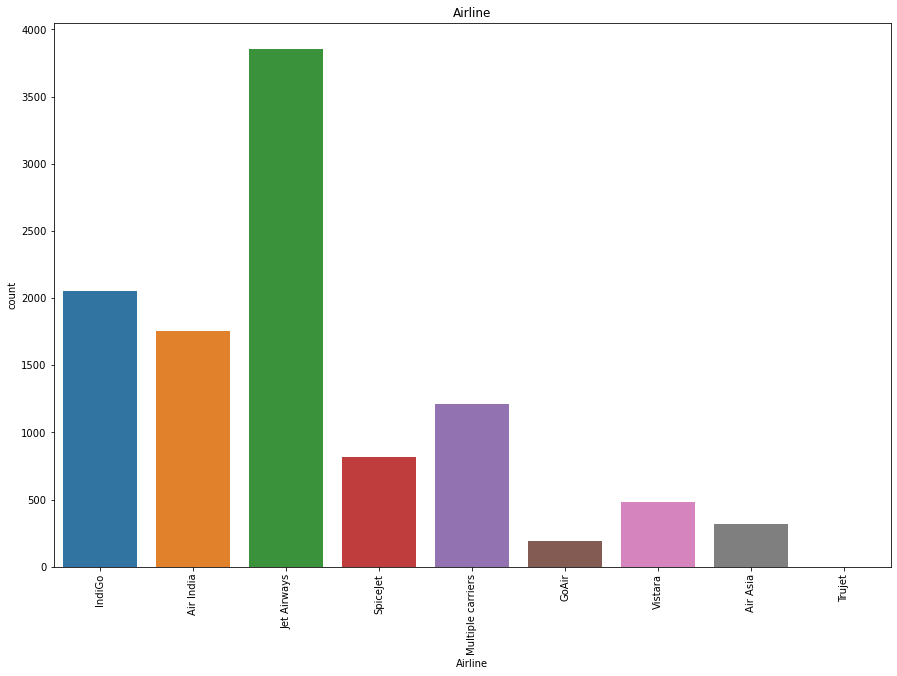

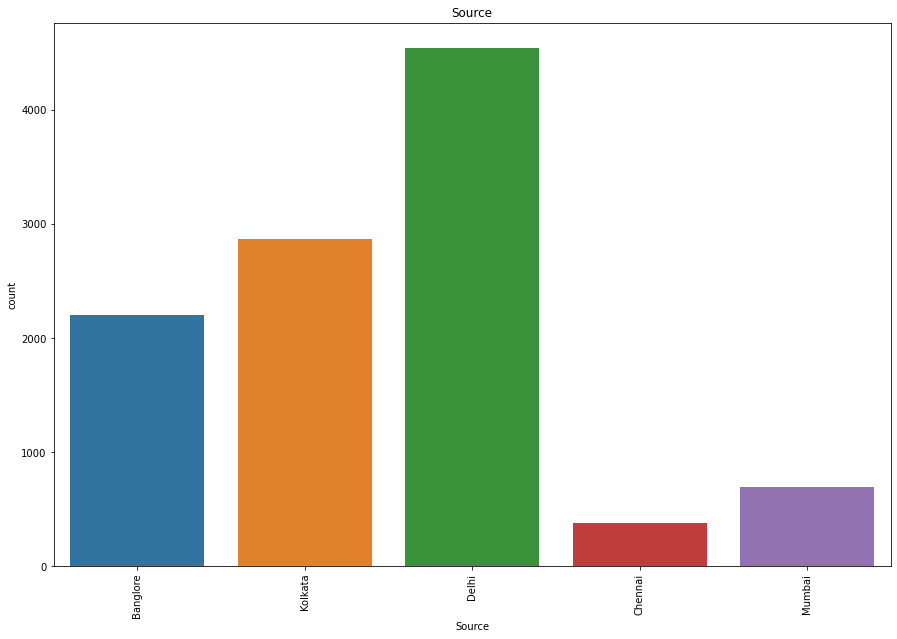

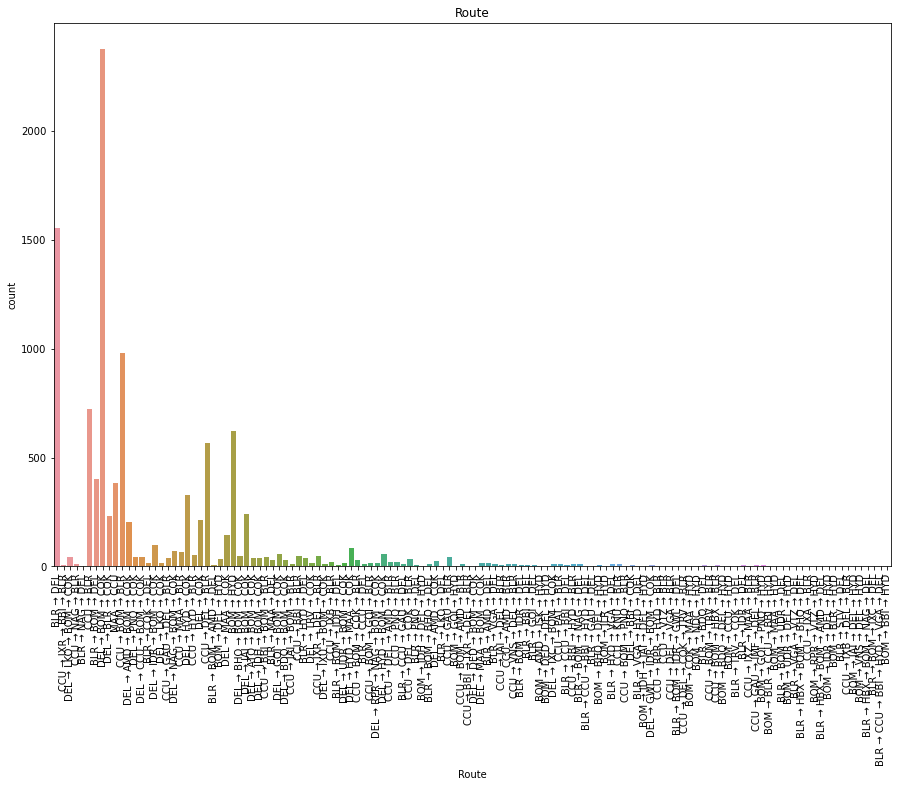

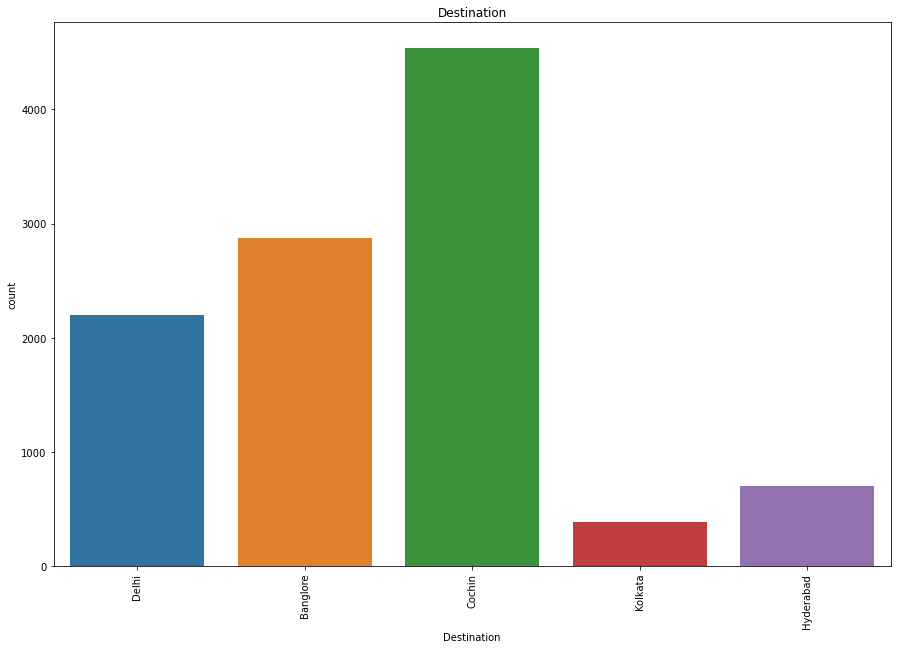

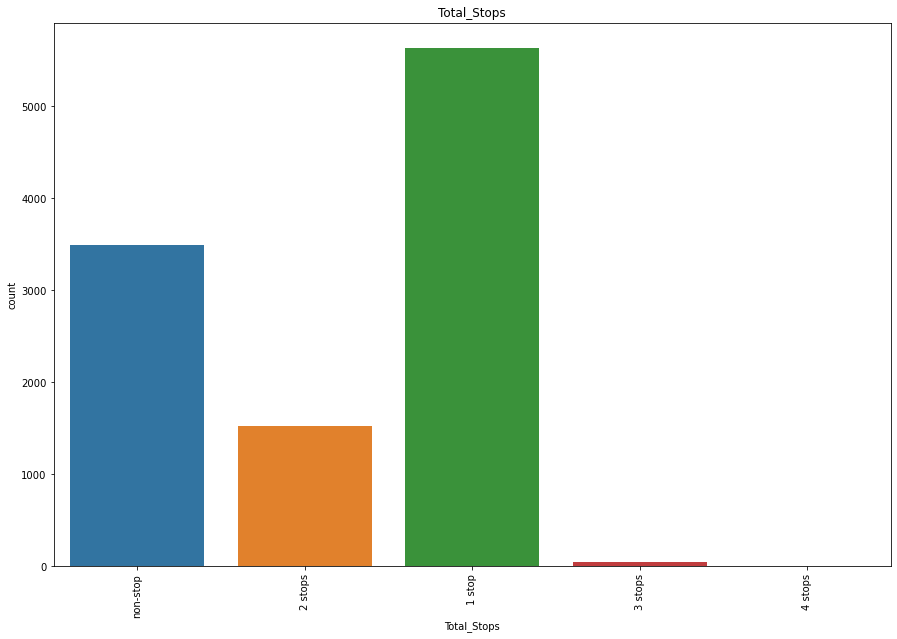

In [29]:
for i in cat_col:
    plt.figure(figsize=(15,10))
    sns.countplot(x=df[i],data=df)
    plt.title(i)
    plt.xticks(rotation=90)
    plt.show()

Key Observations:

1. Most of the passengers travelled to Cochin followed by Delhi, and least travelled destination is Hyderabad
2. Jet Airways is most preferred followed by IndiGo, whereas least travelled is Trujet and GoAir.
3. Mostly passengers starts from Delhi followed by Bangalore, and least starting point is Chennai.
4. Many preffer travell through 1stop


As rouute graph is not clear will make clear visualization again

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127]),
 [Text(0, 0, 'BLR → DEL'),
  Text(1, 0, 'CCU → IXR → BBI → BLR'),
  Text(2, 0, 'DEL → LKO → BOM → COK'),
  Text(3, 0, 'CCU → NAG → BLR'),
  Text(4, 0, 'BLR → NAG → DEL'),
  Text(5, 0, 'CCU → BLR'),
  Text(6, 0, 'BLR → BOM → DEL'),
  Text(7, 0, 'DEL → BOM → COK'),
  Text(8, 0, '

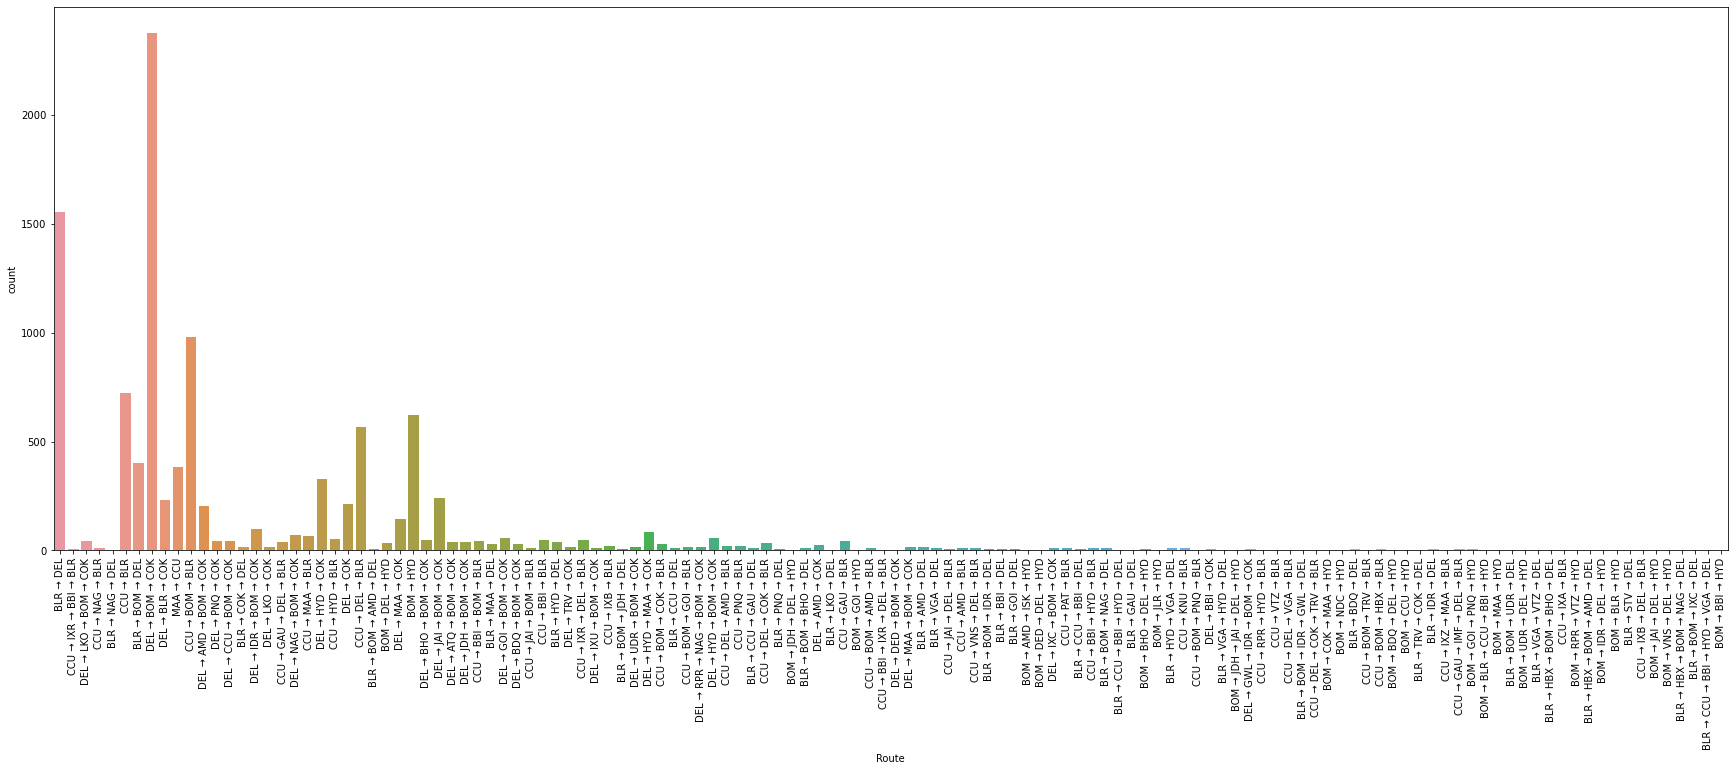

In [30]:
plt.figure(figsize=(30,10))
sns.countplot(df['Route'])
plt.xticks(rotation=90)

Most travelled route is DEL->BOM->COK

# Now lets convert categorical data to numeric using Label Encoder

In [31]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for i in cat_col:
    df[i] = le.fit_transform(df[i])

In [32]:
df.head(5)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Month_of_Journey,Day_of_Journey,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min
0,3,0,2,18,2.833333,4,7,3897,3,24,22,20,1,10
1,1,3,0,84,7.416667,1,7,7662,1,5,5,50,13,15
2,4,2,1,118,19.000000,1,7,13882,9,6,9,25,4,25
3,3,3,0,91,5.416667,0,7,6218,12,5,18,5,23,30
4,3,0,2,29,4.750000,0,7,13302,1,3,16,50,21,35


# Describe

In [33]:
df.describe()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Month_of_Journey,Day_of_Journey,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min
count,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000
mean,3.607133,1.952261,1.174389,74.822896,8.206754,1.458111,6.215670,9087.064121,5.534775,12.682205,12.490686,24.411214,13.348778,24.690630
std,1.790730,1.177221,1.012934,36.728405,6.387288,1.806290,1.560761,4611.359167,2.987489,8.803701,5.748650,18.767980,6.859125,16.506036
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1759.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,2.000000,0.000000,48.000000,2.750000,0.000000,7.000000,5277.000000,3.000000,5.000000,8.000000,5.000000,8.000000,10.000000
50%,4.000000,2.000000,1.000000,73.000000,6.333333,0.000000,7.000000,8372.000000,5.000000,6.000000,11.000000,25.000000,14.000000,25.000000
75%,4.000000,3.000000,2.000000,104.000000,12.583333,4.000000,7.000000,12373.000000,6.000000,21.000000,18.000000,40.000000,19.000000,35.000000
max,8.000000,4.000000,4.000000,127.000000,23.916667,4.000000,8.000000,79512.000000,12.000000,27.000000,23.000000,55.000000,23.000000,55.000000


key observations:

1. It is seen that very few outliers are present in 'Route' column
2. Skewness is present in 'Route', 'Day_of_Journey' columns

# Correlation

In [34]:
df.corr()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Month_of_Journey,Day_of_Journey,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min
Airline,1.000000,-0.013338,0.055167,0.018580,-0.052279,-0.009936,-0.138363,0.021651,0.000900,0.026646,-0.020949,-0.068609,-0.011373,-0.083641
Source,-0.013338,1.000000,-0.434227,0.403403,0.111964,-0.225601,-0.037704,0.015998,0.063052,0.007560,0.059044,-0.056991,0.025632,0.021040
Destination,0.055167,-0.434227,1.000000,-0.231704,-0.330642,0.510200,0.085222,-0.262157,-0.068903,0.006373,-0.087766,0.096699,-0.058137,0.007259
Route,0.018580,0.403403,-0.231704,1.000000,0.284743,-0.437783,0.018968,0.164118,0.042204,0.096530,-0.075044,-0.067984,0.013851,-0.173345
Duration,-0.052279,0.111964,-0.330642,0.284743,1.000000,-0.586666,-0.159021,0.450205,0.061406,-0.029061,0.011288,-0.021284,-0.018018,-0.120803
Total_Stops,-0.009936,-0.225601,0.510200,-0.437783,-0.586666,1.000000,0.170964,-0.571174,-0.056524,0.043907,0.039268,0.048813,-0.095598,0.175973
Additional_Info,-0.138363,-0.037704,0.085222,0.018968,-0.159021,0.170964,1.000000,-0.047273,-0.024236,-0.028028,-0.053323,-0.010973,0.024043,0.044779
Price,0.021651,0.015998,-0.262157,0.164118,0.450205,-0.571174,-0.047273,1.000000,0.010700,-0.165412,0.006819,-0.024492,0.024264,-0.086155
Month_of_Journey,0.000900,0.063052,-0.068903,0.042204,0.061406,-0.056524,-0.024236,0.010700,1.000000,-0.264899,0.028180,0.002152,-0.004338,-0.025786
Day_of_Journey,0.026646,0.007560,0.006373,0.096530,-0.029061,0.043907,-0.028028,-0.165412,-0.264899,1.000000,-0.002251,-0.016521,-0.002124,-0.021424


<AxesSubplot:>

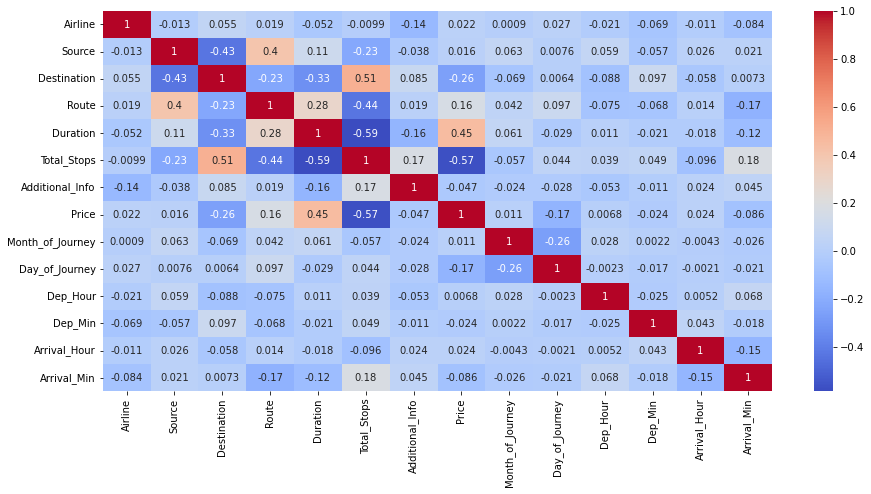

In [35]:
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')

Text(0.5, 1.0, 'correlation with target variable')

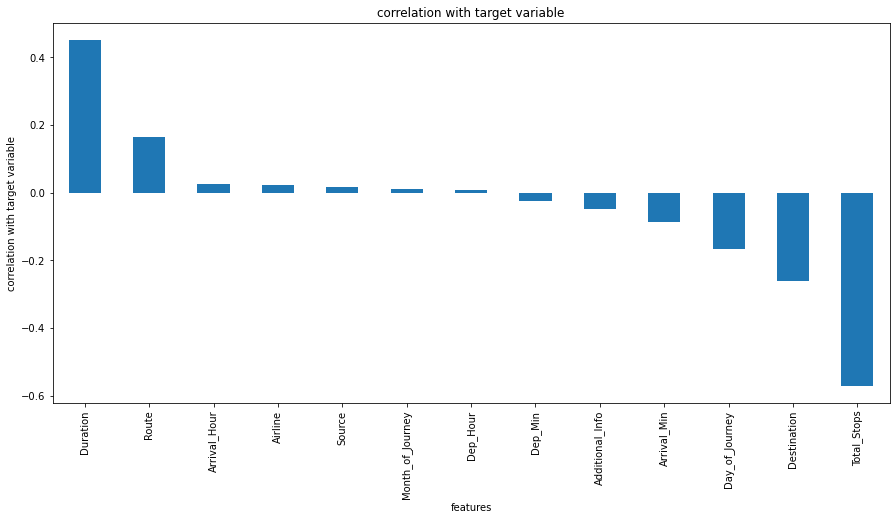

In [36]:
plt.figure(figsize=(15,7))
df.corr()['Price'].sort_values(ascending=False).drop(['Price']).plot.bar()
plt.xlabel("features")
plt.ylabel("correlation with target variable")
plt.title("correlation with target variable")

Key Observations:

1. 'Duration','Route','Arrival_Hour','Airline','Source' are positively correlated with target variable
2. 'Total_Stops', 'Destination','Day_of_Journey','Arrival_Min','Additional_Info' are negatively correlated with target variable

It is true that if 'Duration' decreases number of passengeres will also increases which is highly correlated.

And if 'Total_Stops' increases number of passengers travelling through that airlines also decreases, which is negatively correlated.

# skewness:

In [37]:
df.skew()

Airline             0.135708
Source             -0.424054
Destination         0.846715
Route              -0.502066
Duration            0.828928
Total_Stops         0.631681
Additional_Info    -1.562144
Price               1.812552
Month_of_Journey    0.629540
Day_of_Journey      0.367373
Dep_Hour            0.113073
Dep_Min             0.167029
Arrival_Hour       -0.369988
Arrival_Min         0.110945
dtype: float64

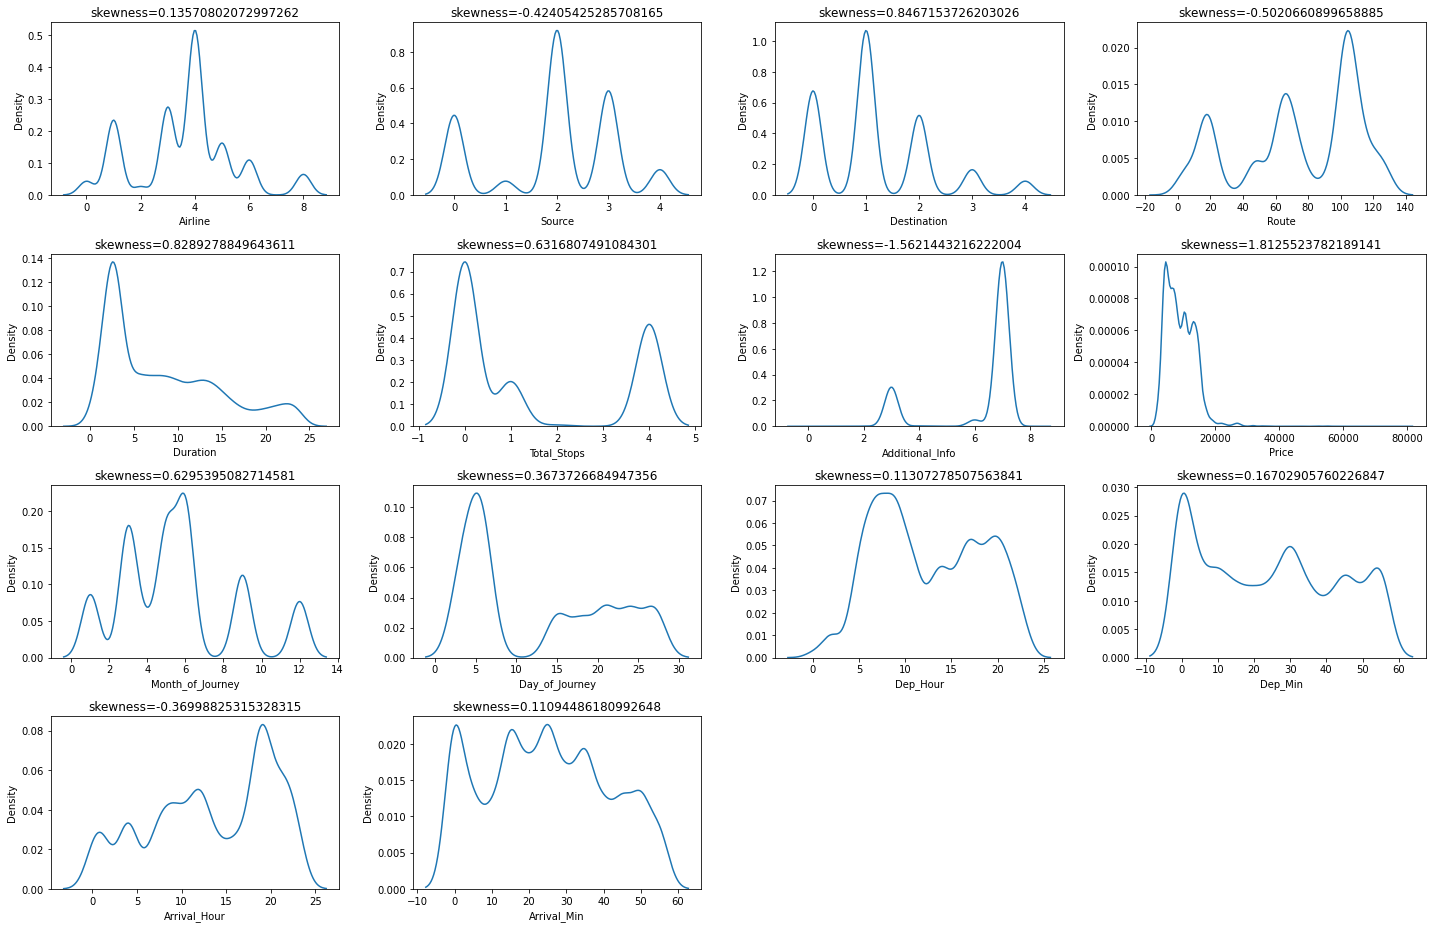

In [38]:
collist = df.columns.values
plt.figure(figsize=(20,13))

for i in range(0,len(collist)):
    plt.subplot(4,4,i+1)
    sns.kdeplot(df[collist[i]])
    plt.title(f"skewness={df[collist[i]].skew()}")
    plt.tight_layout()

key observation:

keeping +/-0.5 as skew value we can find skewness is present in 'Destination', 'Duration', 'Total_Stops','Additional_Info','Price','Month_of_Journey' columns

# Remove skewness by power transform:

In [39]:
x = df.drop(['Price'],axis=1)
y = df['Price']

In [40]:
from sklearn.preprocessing import power_transform
x_new = power_transform(x,method='yeo-johnson')

In [41]:
x_new

array([[-0.30932665, -1.59971174,  0.90761521, ...,  0.02304928,
        -1.79077259, -0.77665027],
       [-1.48653481,  0.90206079, -1.39218116, ...,  1.17929081,
        -0.05592099, -0.43307034],
       [ 0.24517373, -0.01210752,  0.02954764, ...,  0.25580665,
        -1.3625648 ,  0.15681385],
       ...,
       [ 0.24517373, -1.59971174,  0.90761521, ...,  0.02304928,
        -0.34804564, -0.12572081],
       [ 2.33372105, -1.59971174,  0.90761521, ...,  0.46735488,
         0.09041712, -0.77665027],
       [-1.48653481, -0.01210752,  0.02954764, ...,  1.33427329,
         0.82443163, -0.43307034]])

In [42]:
pd.DataFrame(x_new).skew().sort_values(ascending=True)

6    -1.426693
3    -0.442983
10   -0.359559
11   -0.356788
12   -0.347616
1    -0.238259
9    -0.104207
0    -0.041340
7    -0.026453
2    -0.013139
4    -0.003112
8     0.017017
5     0.325203
dtype: float64

In [43]:
x = pd.DataFrame((x_new),columns=x.columns)

# Detecting Outliers:

Airline                 AxesSubplot(0.125,0.71587;0.168478x0.16413)
Source               AxesSubplot(0.327174,0.71587;0.168478x0.16413)
Destination          AxesSubplot(0.529348,0.71587;0.168478x0.16413)
Route                AxesSubplot(0.731522,0.71587;0.168478x0.16413)
Duration               AxesSubplot(0.125,0.518913;0.168478x0.16413)
Total_Stops         AxesSubplot(0.327174,0.518913;0.168478x0.16413)
Additional_Info     AxesSubplot(0.529348,0.518913;0.168478x0.16413)
Price               AxesSubplot(0.731522,0.518913;0.168478x0.16413)
Month_of_Journey       AxesSubplot(0.125,0.321957;0.168478x0.16413)
Day_of_Journey      AxesSubplot(0.327174,0.321957;0.168478x0.16413)
Dep_Hour            AxesSubplot(0.529348,0.321957;0.168478x0.16413)
Dep_Min             AxesSubplot(0.731522,0.321957;0.168478x0.16413)
Arrival_Hour              AxesSubplot(0.125,0.125;0.168478x0.16413)
Arrival_Min            AxesSubplot(0.327174,0.125;0.168478x0.16413)
dtype: object

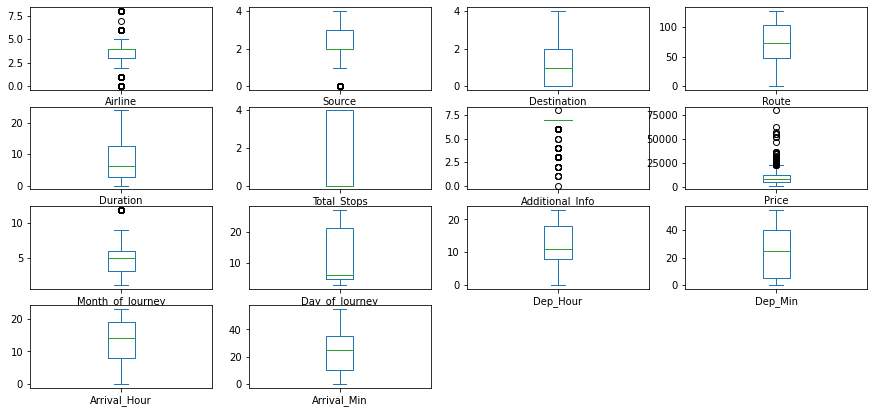

In [44]:
df.plot(kind='box',subplots='True',layout=(4,4),figsize=(15,7))

Key Observation:

1. Outliers are present in 'Airline', 'Source', 'Additional_Info' columns

# Removing Outliers:

In [45]:
from scipy.stats import zscore
z = np.abs(zscore(df))
threshold = 3
df_new = df[(z<3).all(axis=1)]

In [46]:
print("Old DataFrame : ",df.shape[0])
print("New DataFrame : ",df_new.shape[0])
print("Rows Dropped : ",df.shape[0]-df_new.shape[0])

Old DataFrame :  10683
New DataFrame :  10587
Rows Dropped :  96


In [47]:
percentage_loss = (10683-10587)/10683*100
percentage_loss

0.8986239820275204

There is very less data loss so we can remove outliers for our analysis

# Scaling Data

In [48]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = pd.DataFrame(sc.fit_transform(x),columns = x.columns)

# MultiColinearity

In [49]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['Features'] = x.columns
vif

,VIF,Features
0,1.068664,Airline
1,1.571564,Source
2,1.690552,Destination
3,1.417960,Route
4,1.700009,Duration
5,1.909560,Total_Stops
6,1.080875,Additional_Info
7,1.040529,Month_of_Journey
8,1.059321,Day_of_Journey
9,1.033316,Dep_Hour


Here all vif values are less than 5 so no multicolinearity ia present

# Training the model

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score,accuracy_score
from sklearn.model_selection import cross_val_score,cross_val_predict

In [51]:
X.shape

(10683, 13)

In [52]:
y.shape

(10683,)

In [53]:
acc = 0

for i in range(0,1000):
    x_train,x_test,y_train,y_test = train_test_split(X,y,random_state=i,test_size=.22)
    lr = LinearRegression()
    lr.fit(x_train,y_train)
    pred_y = lr.predict(x_test)
    temp = r2_score(y_test,pred_y)
    if temp>acc:
        acc = temp
        best_rstate = i
print("Accuracy_Score : ",acc*100,"Random_State : ",best_rstate)

Accuracy_Score :  39.07093665371498 Random_State :  490


In [54]:
x_train,x_test,y_train,y_test = train_test_split(X,y,random_state=490,test_size=.22)

In [55]:
from sklearn.linear_model import Ridge,Lasso,ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor,AdaBoostRegressor

In [56]:
lr = LinearRegression()
la = Lasso()
ri = Ridge()
el = ElasticNet()
kn = KNeighborsRegressor()
dtr = DecisionTreeRegressor()
svr = SVR()
gbr = GradientBoostingRegressor()
rfr = RandomForestRegressor()
ada = AdaBoostRegressor()

model = [lr,la,ri,el,kn,dtr,svr,gbr,rfr,ada]

In [57]:
score = []
mean_squared_err = []
mean_absolute_err =[]
r2 = []

for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm = m.predict(x_test)
    print("Accuracy Score of ",m, " is ",m.score(x_train,y_train))
    score.append(m.score(x_train,y_train))
   
    
    print("Mean Squared error : ",mean_squared_error(y_test,predm))
    mean_squared_err.append(mean_squared_error(y_test,predm))
    print("Mean Absolute Error : ",mean_absolute_error(y_test,predm))
    mean_absolute_err.append(mean_absolute_error(y_test,predm))
    print("R2 Score : ",r2_score(y_test,predm))
    r2.append(r2_score(y_test,predm))
    print('\n\n')

Accuracy Score of  LinearRegression()  is  0.32073216353650336
Mean Squared error :  11603128.557221226
Mean Absolute Error :  2610.0436867971152
R2 Score :  0.3907093665371498



Accuracy Score of  Lasso()  is  0.32073145878770826
Mean Squared error :  11603615.608399116
Mean Absolute Error :  2610.168414443748
R2 Score :  0.3906837910452261



Accuracy Score of  Ridge()  is  0.3207321606622877
Mean Squared error :  11603155.008748489
Mean Absolute Error :  2610.060990764589
R2 Score :  0.3907079775438519



Accuracy Score of  ElasticNet()  is  0.29857253392905425
Mean Squared error :  12188944.3536706
Mean Absolute Error :  2727.4315569178516
R2 Score :  0.35994765636984793



Accuracy Score of  KNeighborsRegressor()  is  0.8233319779495837
Mean Squared error :  5124110.6164355595
Mean Absolute Error :  1329.2322415993194
R2 Score :  0.7309283795292684



Accuracy Score of  DecisionTreeRegressor()  is  0.9960601118596109
Mean Squared error :  3139137.1437095325
Mean Absolute Error : 

Here we have DecissionTreeRegressor with 99% accuracy and RandomForestRegressor with 98% accuracy. lets do cross validation to find the correct accuracy

# Cross Validation:

In [58]:
mean_score = []
std = []

for m in model:
    CV = cross_val_score(m,x,y,cv=5)
    print("Score of ", m ," is ", CV)
    print("Mean score is : ",CV.mean())
    mean_score.append(CV.mean())
    print("Standard Deviation is : ",CV.std())
    std.append(CV.std())
    print('\n')

Score of  LinearRegression()  is  [0.33197336 0.32261039 0.34456616 0.34084336 0.32378017]
Mean score is :  0.33275468814925874
Standard Deviation is :  0.00882039641166647


Score of  Lasso()  is  [0.33193241 0.32267136 0.34458248 0.34090753 0.32377529]
Mean score is :  0.3327738163407684
Standard Deviation is :  0.00882431790670777


Score of  Ridge()  is  [0.33197036 0.32261193 0.34456359 0.34084641 0.32378307]
Mean score is :  0.3327550722773578
Standard Deviation is :  0.00881937489287127


Score of  ElasticNet()  is  [0.30289103 0.30353277 0.31561879 0.32439757 0.30613403]
Mean score is :  0.310514837136742
Standard Deviation is :  0.00830474215328994


Score of  KNeighborsRegressor()  is  [0.72128089 0.73565568 0.74345884 0.74597309 0.7075438 ]
Mean score is :  0.730782459735278
Standard Deviation is :  0.014460354465267337


Score of  DecisionTreeRegressor()  is  [0.81930292 0.82205814 0.84449452 0.86487393 0.77305994]
Mean score is :  0.8247578899431935
Standard Deviation is :

# HyperTuning:

In [59]:
from sklearn.model_selection import GridSearchCV


In [74]:
param_grid = [
    {"n_estimators"      : [10,20,30,50,100],
     "max_features"      : ["auto", "sqrt", "log2"],
    
    }
]

rf = RandomForestRegressor(random_state=42)

In [75]:
reg_grid = GridSearchCV(rf, param_grid, n_jobs=-1, cv=5)

In [76]:
reg_grid.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid=[{'max_features': ['auto', 'sqrt', 'log2'],
                          'n_estimators': [10, 20, 30, 50, 100]}])

In [82]:
reg_grid.best_score_

0.8713072755396059

In [83]:
reg_grid.best_estimator_

RandomForestRegressor(random_state=42)

In [84]:
reg_final_model = reg_grid.best_estimator_
pred = cross_val_predict(reg_finalb_model,x_train,y_train,cv=5,n_jobs=-1)


In [85]:
reg_final_model.fit(x_train,y_train)

RandomForestRegressor(random_state=42)

In [86]:
reg_final_model.score(x_train,y_train)


0.9822359070237893

we have 98% accuracy after hypertuning

# Saving best model

In [87]:
import joblib
joblib.dump(reg_final_model,"Flight_Price_Prediction.obj")

['Flight_Price_Prediction.obj']

# Predicted flight price for test dataset using saved model of trained dataset:

In [88]:
# Loading the saved model
model=joblib.load("Flight_Price_Prediction.obj")

#Prediction
prediction = model.predict(x_test)
prediction

array([12764.28,  9430.8 ,  9076.59, ..., 12542.95,  4602.61,  3860.74])

In [93]:
predicted_flight_price = pd.DataFrame({"Predicted_Price":prediction})
predicted_flight_price
                                      

,Predicted_Price
0,12764.28
1,9430.80
2,9076.59
3,7228.84
4,4058.81
...,...
2346,10275.65
2347,4237.50
2348,12542.95
2349,4602.61


In [95]:
predicted_flight_price.to_csv("Predicted_Flight_Price.csv")

# Conclusion:

we can conclude that flight price is predicted based on the 'Duration'. If Duration is less flight price is high.